Inputs: {'Permintaan': 3321, 'Persediaan': 1534}
Outputs: {'Produksi': 3333.3333333333335}


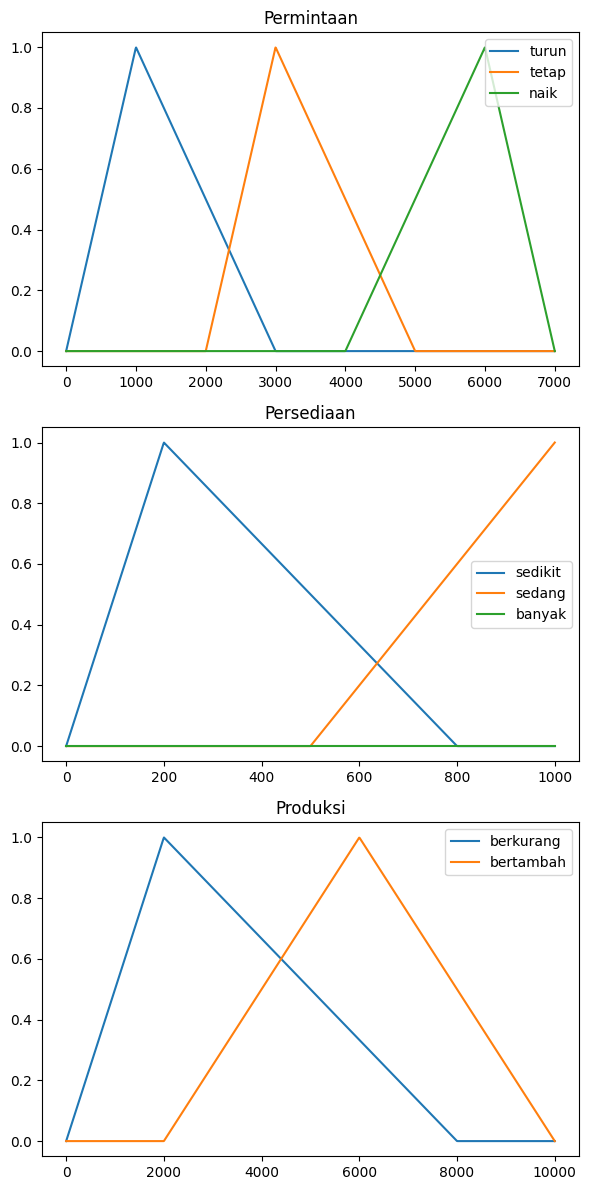

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Membership Function Class
class MembershipFunction:
    def __init__(self, points):
        self.points = points

    def compute_membership(self, x):
        x1, x2, x3 = self.points
        if x <= x1 or x >= x3:
            return 0
        elif x1 < x <= x2:
            return (x - x1) / (x2 - x1)
        elif x2 < x <= x3:
            return (x3 - x) / (x3 - x2)
        else:
            return 0

# Fuzzy Variable Class
class FuzzyVariable:
    def __init__(self, name):
        self.name = name
        self.terms = {}

    def add_term(self, term_name, membership_function):
        self.terms[term_name] = membership_function

    def fuzzify(self, value):
        fuzzified_values = {}
        for term, mf in self.terms.items():
            fuzzified_values[term] = mf.compute_membership(value)
        return fuzzified_values

# Fuzzy Rule Class
class FuzzyRule:
    def __init__(self, antecedents, consequent):
        self.antecedents = antecedents  # List of tuples (variable, term)
        self.consequent = consequent  # Tuple (variable, term)

    def evaluate(self, fuzzified_inputs):
        antecedent_values = [fuzzified_inputs[var][term] for var, term in self.antecedents]
        return min(antecedent_values)  # Using MIN operator

# Fuzzy System Class
class FuzzySystem:
    def __init__(self):
        self.variables = {}
        self.rules = []

    def add_variable(self, variable):
        self.variables[variable.name] = variable

    def add_rule(self, rule):
        self.rules.append(rule)

    def infer(self, inputs):
        fuzzified_inputs = {var: self.variables[var].fuzzify(value) for var, value in inputs.items()}

        consequent_values = {}
        for rule in self.rules:
            rule_strength = rule.evaluate(fuzzified_inputs)
            consequent_var, consequent_term = rule.consequent
            if consequent_var not in consequent_values:
                consequent_values[consequent_var] = {}
            if consequent_term not in consequent_values[consequent_var]:
                consequent_values[consequent_var][consequent_term] = []

            consequent_values[consequent_var][consequent_term].append(rule_strength)

        # Defuzzify using weighted average
        defuzzified_outputs = {}
        for var, terms in consequent_values.items():
            numerator = 0
            denominator = 0
            for term, strengths in terms.items():
                term_mf = self.variables[var].terms[term]
                centroid = sum(term_mf.points) / len(term_mf.points)  # Approximate centroid
                max_strength = max(strengths)
                numerator += max_strength * centroid
                denominator += max_strength
            defuzzified_outputs[var] = numerator / denominator if denominator != 0 else 0

        return defuzzified_outputs

# Define Variables
permintaan = FuzzyVariable("Permintaan")
permintaan.add_term("turun", MembershipFunction([0, 1000, 3000]))
permintaan.add_term("tetap", MembershipFunction([2000, 3000, 5000]))
permintaan.add_term("naik", MembershipFunction([4000, 6000, 7000]))

persediaan = FuzzyVariable("Persediaan")
persediaan.add_term("sedikit", MembershipFunction([0, 200, 800]))
persediaan.add_term("sedang", MembershipFunction([500, 1000, 1500]))
persediaan.add_term("banyak", MembershipFunction([1200, 1500, 2000]))

produksi = FuzzyVariable("Produksi")
produksi.add_term("berkurang", MembershipFunction([0, 2000, 8000]))
produksi.add_term("bertambah", MembershipFunction([2000, 6000, 10000]))

# Define Rules
rules = [
    FuzzyRule([("Permintaan", "turun"), ("Persediaan", "sedikit")], ("Produksi", "bertambah")),
    FuzzyRule([("Permintaan", "turun"), ("Persediaan", "sedang")], ("Produksi", "berkurang")),
    FuzzyRule([("Permintaan", "turun"), ("Persediaan", "banyak")], ("Produksi", "berkurang")),
    FuzzyRule([("Permintaan", "tetap"), ("Persediaan", "sedikit")], ("Produksi", "bertambah")),
    FuzzyRule([("Permintaan", "tetap"), ("Persediaan", "sedang")], ("Produksi", "berkurang")),
    FuzzyRule([("Permintaan", "tetap"), ("Persediaan", "banyak")], ("Produksi", "berkurang")),
    FuzzyRule([("Permintaan", "naik"), ("Persediaan", "sedikit")], ("Produksi", "bertambah")),
    FuzzyRule([("Permintaan", "naik"), ("Persediaan", "sedang")], ("Produksi", "bertambah")),
    FuzzyRule([("Permintaan", "naik"), ("Persediaan", "banyak")], ("Produksi", "berkurang")),
]

# Initialize System
fuzzy_system = FuzzySystem()
fuzzy_system.add_variable(permintaan)
fuzzy_system.add_variable(persediaan)
fuzzy_system.add_variable(produksi)
for rule in rules:
    fuzzy_system.add_rule(rule)

# Example Inference
inputs = {"Permintaan": 3321, "Persediaan": 1534}
outputs = fuzzy_system.infer(inputs)
print("Inputs:", inputs)
print("Outputs:", outputs)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Permintaan
x = np.linspace(0, 7000, 1000)
axs[0].plot(x, [permintaan.terms["turun"].compute_membership(xi) for xi in x], label="turun")
axs[0].plot(x, [permintaan.terms["tetap"].compute_membership(xi) for xi in x], label="tetap")
axs[0].plot(x, [permintaan.terms["naik"].compute_membership(xi) for xi in x], label="naik")
axs[0].set_title("Permintaan")
axs[0].legend()

# Persediaan
x = np.linspace(0, 1000, 1000)
axs[1].plot(x, [persediaan.terms["sedikit"].compute_membership(xi) for xi in x], label="sedikit")
axs[1].plot(x, [persediaan.terms["sedang"].compute_membership(xi) for xi in x], label="sedang")
axs[1].plot(x, [persediaan.terms["banyak"].compute_membership(xi) for xi in x], label="banyak")
axs[1].set_title("Persediaan")
axs[1].legend()

# Produksi
x = np.linspace(0, 10000, 1000)
axs[2].plot(x, [produksi.terms["berkurang"].compute_membership(xi) for xi in x], label="berkurang")
axs[2].plot(x, [produksi.terms["bertambah"].compute_membership(xi) for xi in x], label="bertambah")
axs[2].set_title("Produksi")
axs[2].legend()

plt.tight_layout()
plt.show()
